In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
df=pd.read_csv('../Data/Clean_Data_2.csv')
label=pd.read_csv('../Data/Labels_Data.csv')
cr=pd.read_csv('../Data/credit_report.csv')
features=pd.read_csv('../Data/features.csv')


In [275]:
pd.options.display.max_columns=30

In [276]:
df['Report']=cr.Report

In [277]:
df.head(2)

,Customer_ID,Name,Age,Annual_Income,Monthly_Salary,Bank_Accounts,Credit_Cards,Loans,Delay_from_due_date,Delayed_Payments,Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance,Occupation,Credit_Mix,Payment_of_Min_Amount,EMI_Percentage,Investment_Percentage,Age_Category,Report
0,cus_0x1000,alistair barrf,17.0,30626.0,2706.0,6.0,5.0,2.0,62.25,25.0,11.0,1562.91,33.477546,10.0,335.375341,Lawyer,Bad,Yes,1.59,5.86,Teen,POOR
1,cus_0x1009,arunah,25.0,52313.0,4250.0,6.0,5.0,5.0,7.25,19.5,4.0,202.68,29.839984,27.0,428.743155,Mechanic,Standard,Yes,2.55,3.45,Teen,AVERAGE


In [278]:
label.head(2)

,Customer_ID,Age,Annual_Income,Monthly_Salary,Bank_Accounts,Credit_Cards,Loans,Delay_from_due_date,Delayed_Payments,Credit_Limit_Change_%,Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,EMI,Investment,Occupation,Credit_Mix,Minimum_Payment
0,cus_0x1000,Teen,1,1,2,2,3,1,1,1,2,3,2,1,3,3,Lawyer,1,1
1,cus_0x1009,Teen,1,1,2,2,2,3,1,2,3,3,3,3,3,3,Mechanic,2,1


In [279]:
cr.head(2)

,Customer_ID,Customer_Name,Age,Occupation,Score,Report
0,CUS_0X1000,ALISTAIR BARRF,17,Lawyer,450,POOR
1,CUS_0X1009,ARUNAH,25,Mechanic,612,AVERAGE


In [280]:
features.head(2)

,Customer_ID,Delayed_Payments,Credit_Mix,Credit_History_Age,Credit_Inquiries,Annual_Income,Credit_Utilization_Ratio,Outstanding_Debt,Loans,Credit_Cards,Occupation,Report
0,CUS_0X1000,25.0,Bad,10.0,11.0,30626.0,33.477546,1562.91,2.0,5.0,Lawyer,POOR
1,CUS_0X1009,19.5,Standard,27.0,4.0,52313.0,29.839984,202.68,5.0,5.0,Mechanic,AVERAGE


# Trends, Patterns, Insights

In [281]:
sample1=df.sample(frac=.10)
sample2=df.sample(frac=.10)
sample3=df.sample(frac=.10)
sample4=df.sample(frac=.10)

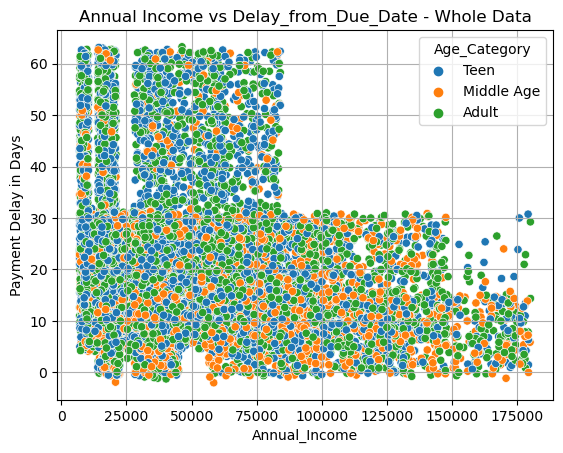

In [282]:
sns.scatterplot(x=df.Annual_Income,y=df.Delay_from_due_date,data=df,hue='Age_Category')
plt.title("Annual Income vs Delay_from_Due_Date - Whole Data")
plt.ylabel("Payment Delay in Days")
plt.grid()
plt.show()

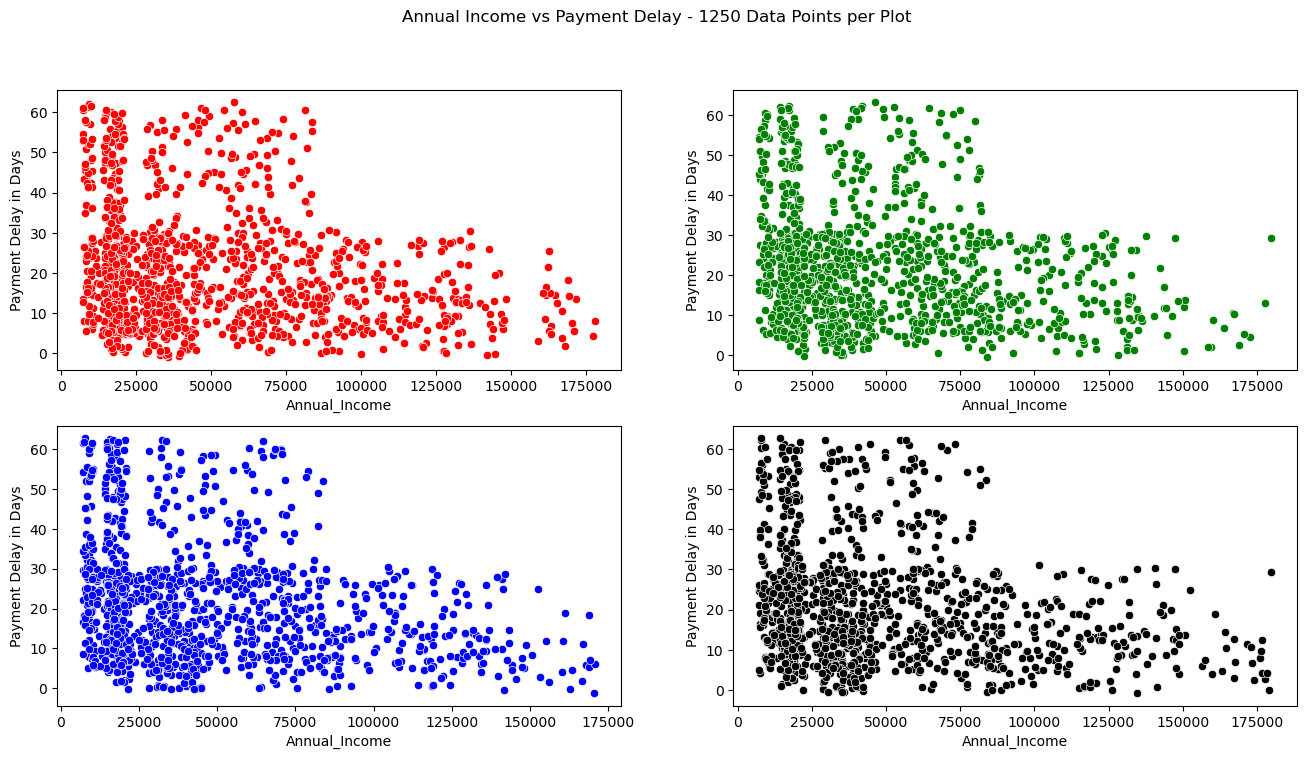

In [283]:
plt.figure(figsize=(16,8)).suptitle("Annual Income vs Payment Delay - 1250 Data Points per Plot")



plt.subplot(2,2,1)
sns.scatterplot(x=sample1.Annual_Income,y=sample1.Delay_from_due_date,data=sample1,color='red')
plt.ylabel("Payment Delay in Days")

plt.subplot(2,2,2)
sns.scatterplot(x=sample2.Annual_Income,y=sample2.Delay_from_due_date,data=sample2,color='green')
plt.ylabel("Payment Delay in Days")

plt.subplot(2,2,3)
sns.scatterplot(x=sample3.Annual_Income,y=sample3.Delay_from_due_date,data=sample3,color='blue')
plt.ylabel("Payment Delay in Days")
plt.subplot(2,2,4)
sns.scatterplot(x=sample4.Annual_Income,y=sample4.Delay_from_due_date,data=sample4,color='black')
plt.ylabel("Payment Delay in Days")

plt.show()

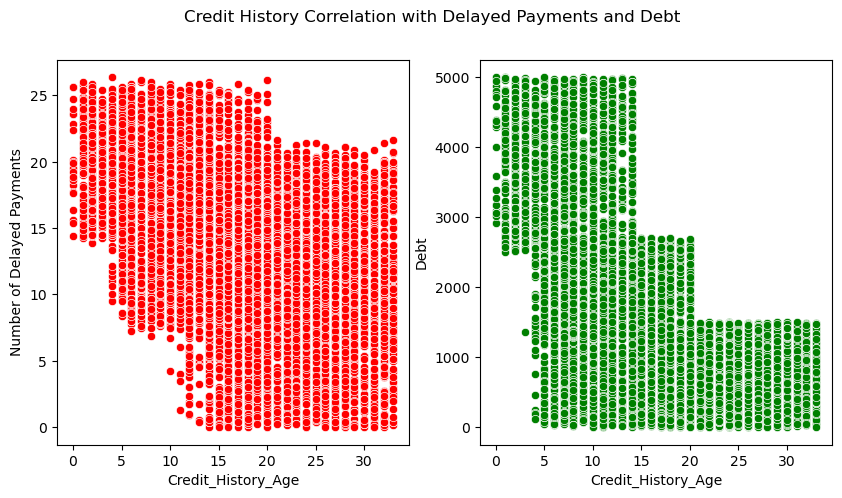

In [284]:
plt.figure(figsize=(10,5)).suptitle("Credit History Correlation with Delayed Payments and Debt")



plt.subplot(1,2,1)
sns.scatterplot(x=df.Credit_History_Age,y=df.Delayed_Payments,data=sample1,color='red')
plt.ylabel("Number of Delayed Payments")

plt.subplot(1,2,2)
sns.scatterplot(x=df.Credit_History_Age,y=df.Outstanding_Debt,data=sample2,color='green')
plt.ylabel("Debt")


plt.show()

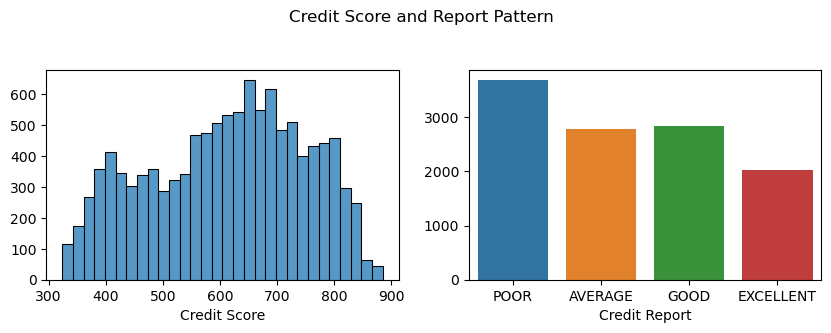

In [285]:
plt.figure(figsize=(10,6)).suptitle('Credit Score and Report Pattern')

plt.subplot(2,2,1)

sns.histplot(x=cr.Score)
plt.xlabel('Credit Score')
plt.ylabel('')

plt.subplot(2,2,2)

sns.countplot(x=cr.Report)
plt.xlabel('Credit Report')
plt.ylabel('')

plt.show()

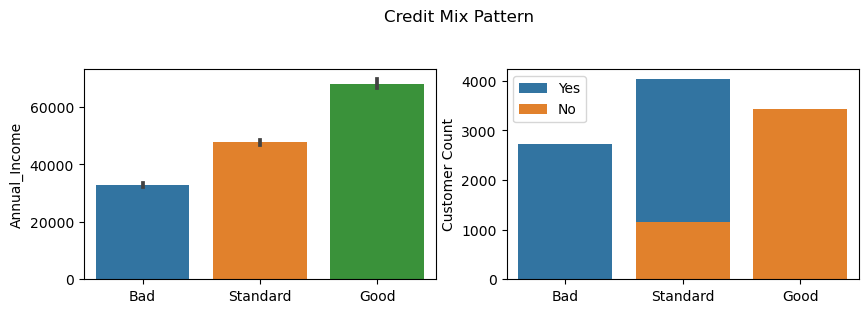

In [286]:
plt.figure(figsize=(10,6)).suptitle('Credit Mix Pattern')

plt.subplot(2,2,1)
sns.barplot(y=df.Annual_Income,x=df.Credit_Mix,data=df)
plt.xlabel('')


plt.subplot(2,2,2)
sns.countplot(x='Credit_Mix',data=df,hue='Payment_of_Min_Amount',dodge=False)
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Customer Count')

plt.show()

<AxesSubplot:title={'center':'Heatmap representation of credit score features'}>

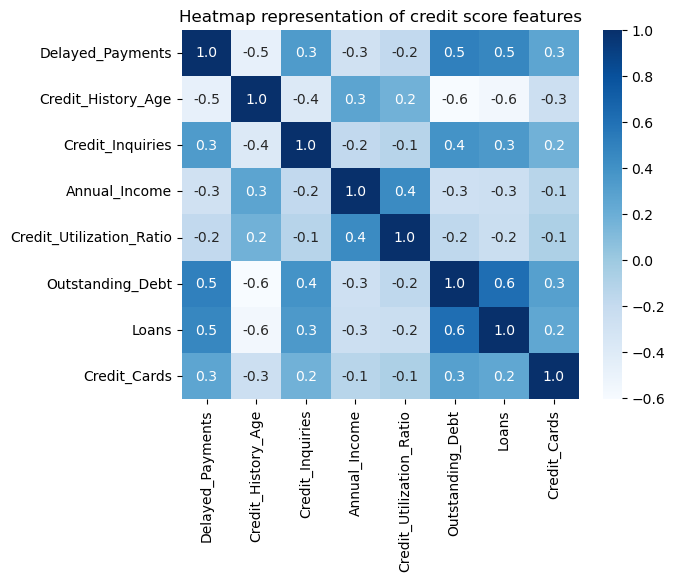

In [287]:
plt.title('Heatmap representation of credit score features')
sns.heatmap(features.corr(),annot=True,fmt=".1f",cmap='Blues')

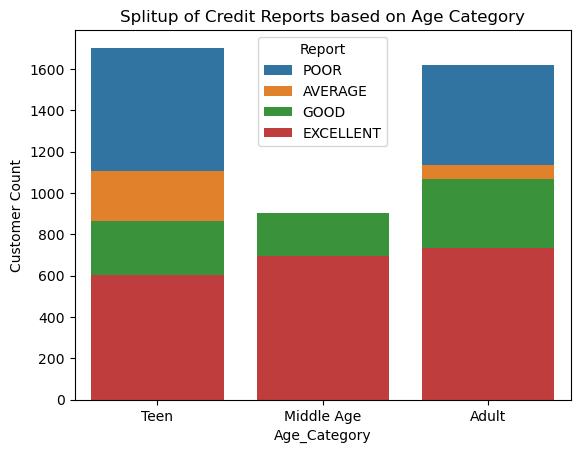

In [288]:
plt.title("Splitup of Credit Reports based on Age Category")

sns.countplot(x='Age_Category',data=df,hue='Report',dodge=False)
plt.ylabel('Customer Count')

plt.show()